In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

In [5]:
path = r"C:\Users\PRAJAKTA\Downloads\trainRF.csv"

In [16]:
trf = pd.read_csv(path)

In [17]:
trf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
trf.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [19]:
trf.shape

(2000, 21)

In [20]:
trf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [21]:
trf.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [22]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [23]:
trf.duplicated().sum()

np.int64(0)

In [24]:
trf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [26]:
trf.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [28]:
trf.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [29]:
# spliting in  x and y
x = trf.drop('price_range', axis = 1)
y = trf['price_range']

In [30]:
# value_counts
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [31]:
col = list(x.columns)

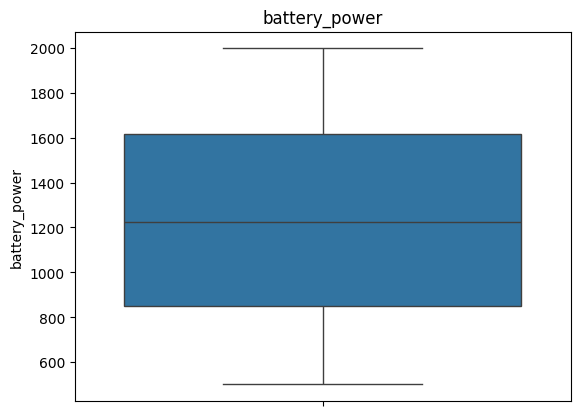

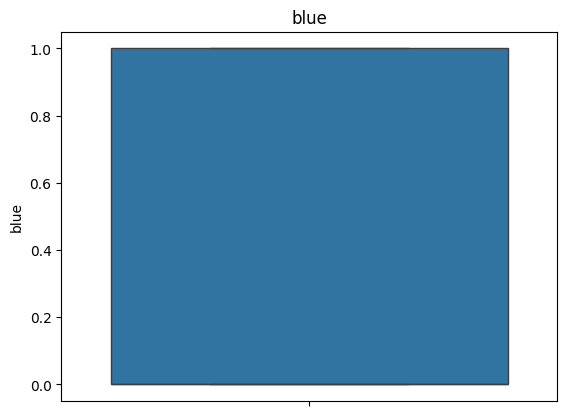

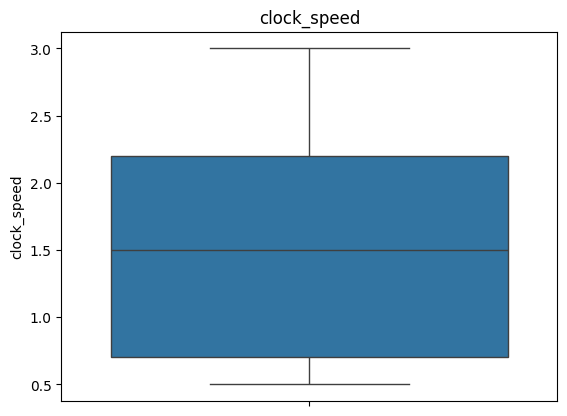

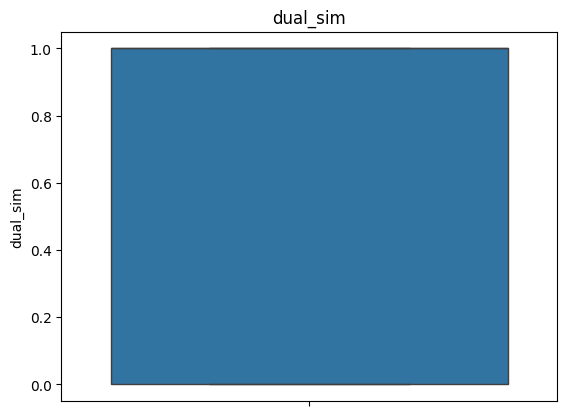

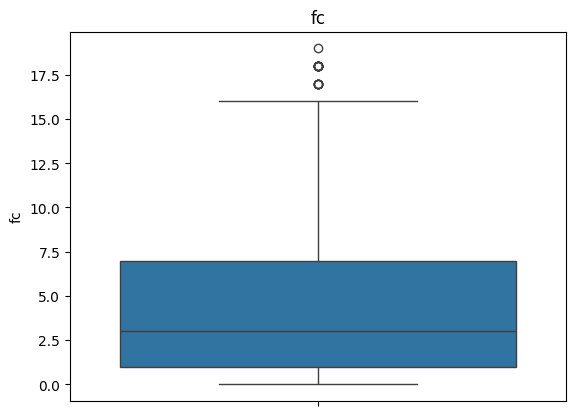

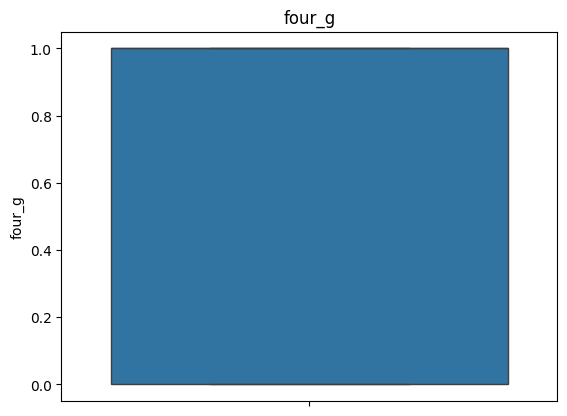

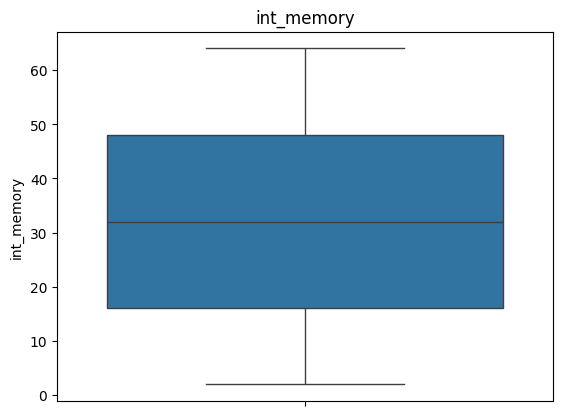

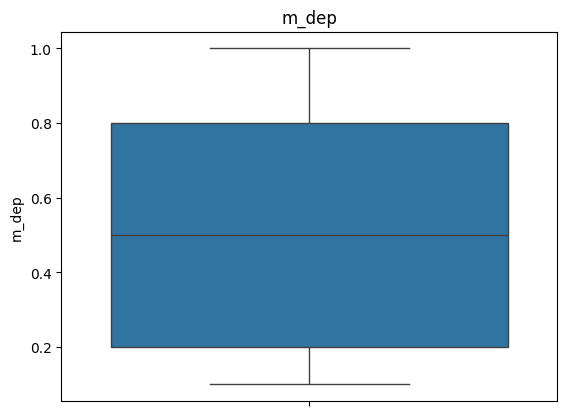

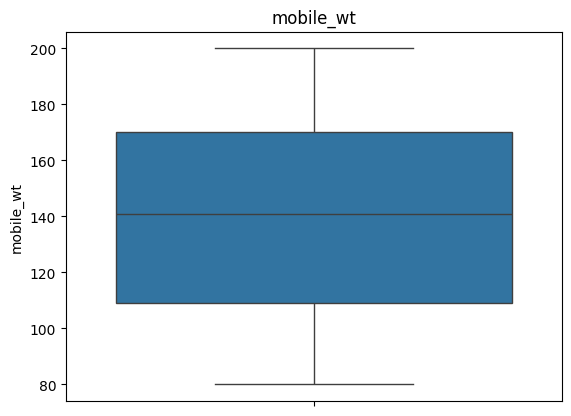

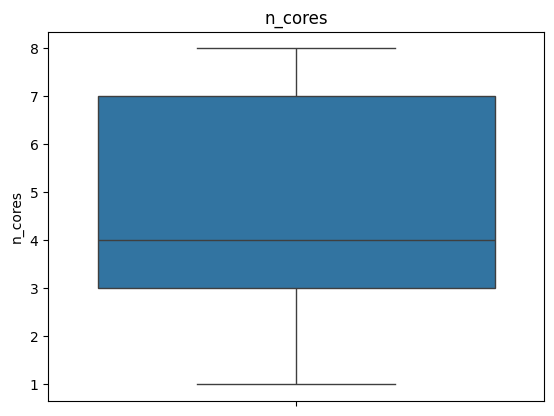

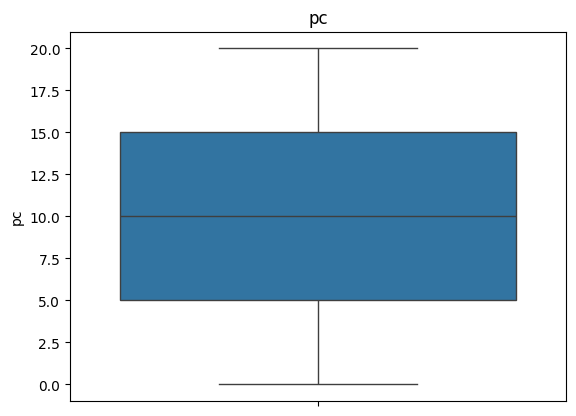

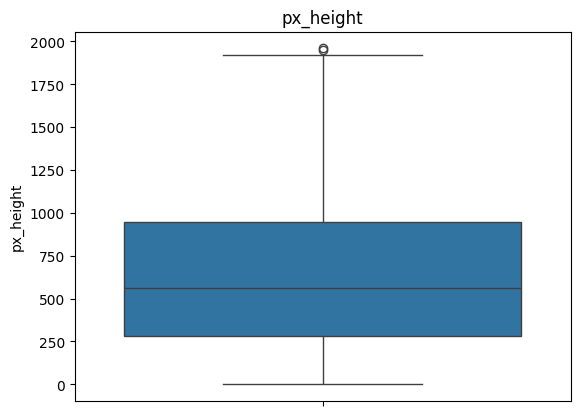

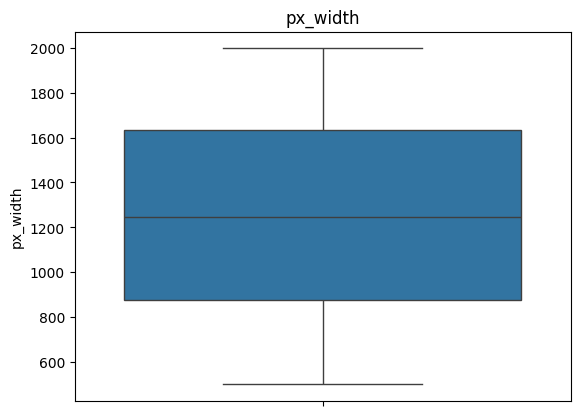

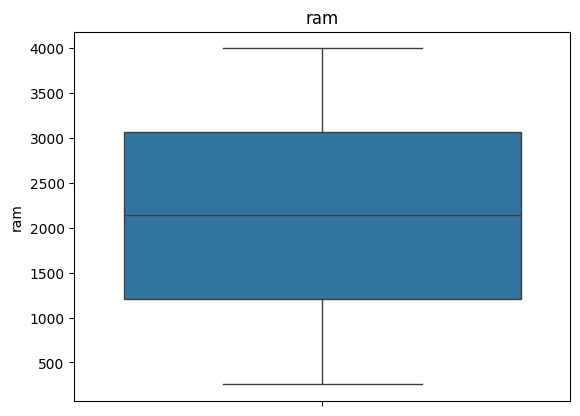

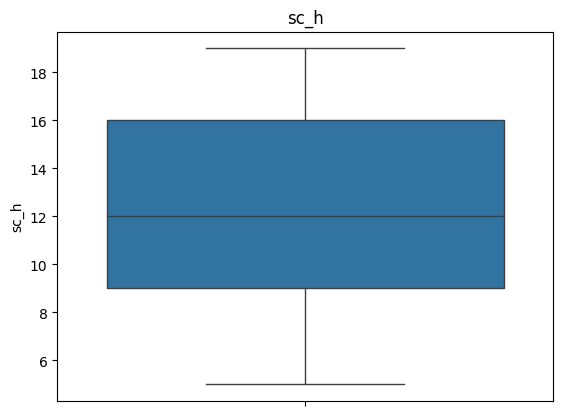

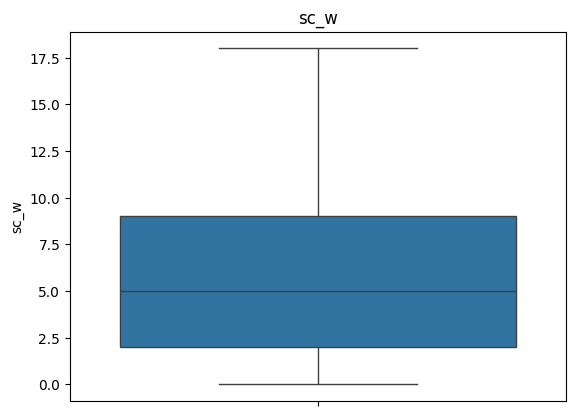

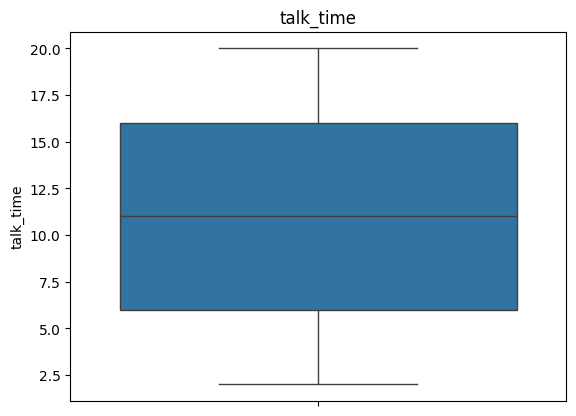

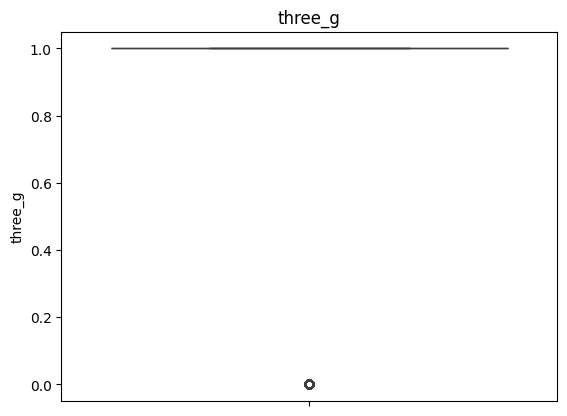

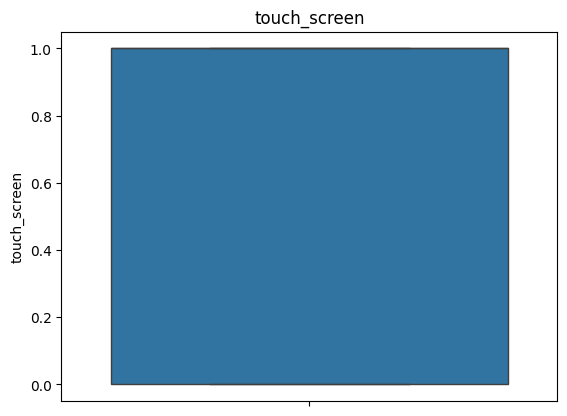

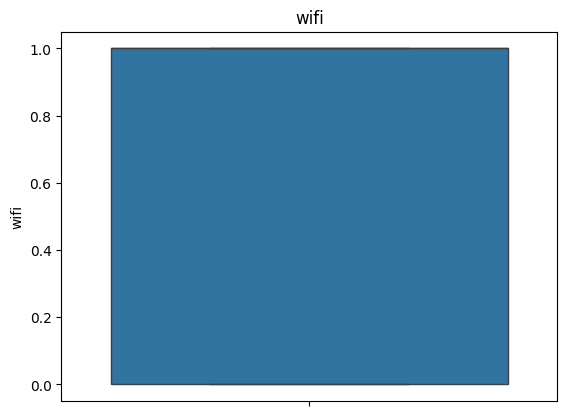

In [33]:
for i in col:
    sns.boxplot(data = x, y= i )
    plt.title(f'{i}')
    plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [36]:
x1 = st.fit_transform(x)

In [37]:
x_train, x_test,y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=12)

In [39]:
from sklearn.svm import SVC

In [68]:
svc = SVC(C= 0.5, gamma= 'auto')

In [69]:
svc.fit(x_train, y_train)

SVC(C=0.5, gamma='auto')

In [70]:
svc.score(x_train, y_train)

0.97125

In [71]:
print(y_train.shape)
print(y_train_pred.shape)

(1600,)
(1600,)


In [72]:
# traning evaluation
y_train_pred = svc.predict(x_train)
print('confusion_matrix -->', confusion_matrix(y_train, y_train_pred))
print('accuracy -->', accuracy_score(y_train, y_train_pred))
print('recall -->', recall_score(y_train, y_train_pred, average= 'micro'))
print('precision -->', precision_score(y_train, y_train_pred, average= 'micro'))
print('f1_score -->',f1_score(y_train, y_train_pred, average= 'micro'))
print('classification -->', classification_report(y_train, y_train_pred))


confusion_matrix --> [[391   7   0   0]
 [  6 381   8   0]
 [  0   8 390   7]
 [  0   0  10 392]]
accuracy --> 0.97125
recall --> 0.97125
precision --> 0.97125
f1_score --> 0.97125
classification -->               precision    recall  f1-score   support

           0       0.98      0.98      0.98       398
           1       0.96      0.96      0.96       395
           2       0.96      0.96      0.96       405
           3       0.98      0.98      0.98       402

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [73]:
# Testing evaluation
y_test_pred = svc.predict(x_test)
print('confusion_matrix -->', confusion_matrix(y_test, y_test_pred))
print('accuracy -->', accuracy_score(y_test, y_test_pred))
print('recall -->', recall_score(y_test, y_test_pred, average= 'micro'))
print('precision -->', precision_score(y_test, y_test_pred, average= 'micro'))
print('f1_score -->',f1_score(y_test, y_test_pred, average= 'micro'))
print('classification', classification_report(y_test, y_test_pred))

confusion_matrix --> [[94  8  0  0]
 [ 4 86 15  0]
 [ 0  6 88  1]
 [ 0  0 14 84]]
accuracy --> 0.88
recall --> 0.88
precision --> 0.88
f1_score --> 0.88
classification               precision    recall  f1-score   support

           0       0.96      0.92      0.94       102
           1       0.86      0.82      0.84       105
           2       0.75      0.93      0.83        95
           3       0.99      0.86      0.92        98

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400

